Random Forest and Decision tree best tools for classification. Clarity increases from Top to Bottom

Employee turnover. Attrition and explore the reason as to why people are leaving and predict if employee will leave us or not

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv

--2023-03-14 04:46:56--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2023-03-14 04:46:57--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f1360d57deb46392a517601ff.dl.dropboxusercontent.com/cd/0/inline/B4PALUPFwkQ-Rp5pferujJjwkx3PuBHMSeeHKVfcDjEPtERSzHsoYT8i9P5kQRdZjXEMLeAxfI7qITKW-pK-28evE5VwlWj8nUnHsDJ3_BIFejGSCz0bc4BdbmmBiBRHbndrzXETPDxQNi03eqC_3jvCT8K-ab2Njoy9_t4RPQS8UQ/file# [following]
--2023-03-14 04:46:58--  https://uc6f1360d57deb46392a517601ff.dl.dropboxusercontent.com/cd/0/inline/B4PALUPFwkQ-Rp5pferujJjwkx3PuBHMSeeHKVfcDjEPtERSzHsoYT8i9P5kQR

In [ ]:
df = pd.read_csv('employee_data.csv')
df.shape

(14999, 10)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df['quit'].unique()

array([1, 0])

In [ ]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Text(0, 0.5, 'Number Of Employees')

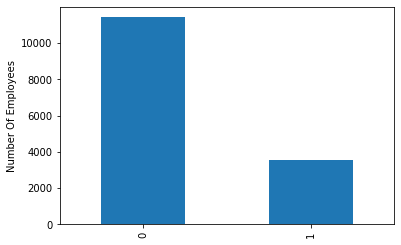

In [ ]:
df['quit'].value_counts().plot(kind='bar').set_ylabel('Number Of Employees')

In [ ]:
df['department'].unique(), df['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [ ]:
df.isna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

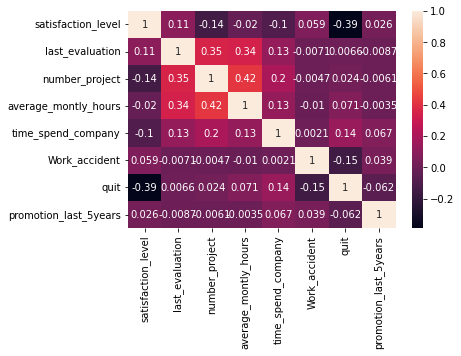

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True)

Display tree within jupyter. from sklearn.tree import 

Gini index shows how pure something is. If less then purer. What is under, good and over fitting concept is VIP

Bootstrap, voting, bagging(parallel trees), boosting(sequential tree). Ensemble techniques